In [ ]:
 #make sure fastai is up to date 
!curl -s https://course.fast.ai/setup/colab | bash

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


In [ ]:
from fastai.imports import *
from fastai.vision.all import *  # import everything from fastai

In [ ]:
#import google drive package for creating folders and pull from folders in your drive
from  google.colab import drive

In [ ]:
# connect workbook to google drive folder to access images 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#save path to project folder --> path in my google drive where this project is hosted
root_path = 'gdrive/My Drive/AI_Projects/'

In [ ]:
# uncomment to make balls folder 
#(Path(root_path)/'Balls').mkdir(parents=True, exist_ok=True)

In [ ]:
#save path for balls folder that contains images and variable tags 
proj_path = 'gdrive/My Drive/AI_Projects/Kuih/'

In [ ]:
#make folder names 
folders = ['Apam Balik','Bahulu','Keria','Sugar Donut','Ketayap','Bingka Ubi','Tepung Pelita','Onde-onde','Abok-abok','Talam','Seri Muka','Dodol','Karipap','Putu Piring']

In [ ]:
#create all folders in /Kuih folder
for i in folders:
  path = Path(proj_path)
  dest = (path/i).mkdir(parents=True, exist_ok=True)

In [ ]:
#save fastai path 
p_path = Path(proj_path)

In [ ]:
# check for broken images
failed = verify_images(get_image_files(p_path)) # check kalau ada broken images then buang
failed.map(Path.unlink)
len(failed)

0

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # inputs = images, and the outputs = categories
    get_items=get_image_files, # to get all the inputs (image)
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # Split data to training and validation,20% for validation
    get_y=parent_label,# get input from each folder
    item_tfms=[Resize(224, method='squish')]# Before training, resize image to 224x224 pixels by "squishing" them
).dataloaders(p_path)



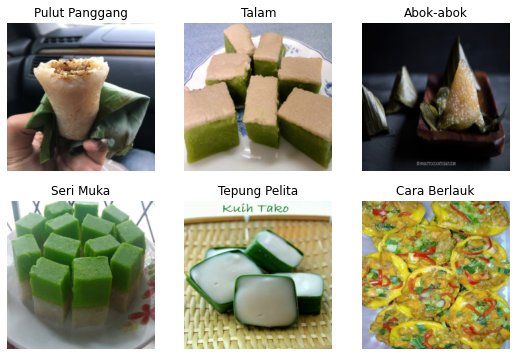

In [ ]:
# show some of the images
dls.show_batch(max_n=6) 

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate) 
learn.fine_tune(7) # fine tune with 7 epoch
# error_rate = 1-accuracy

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

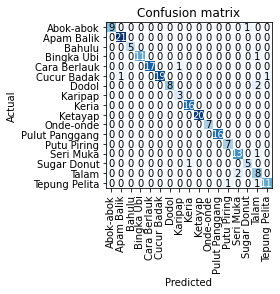

In [ ]:
#plot results of model on validation set 
interp.plot_confusion_matrix()

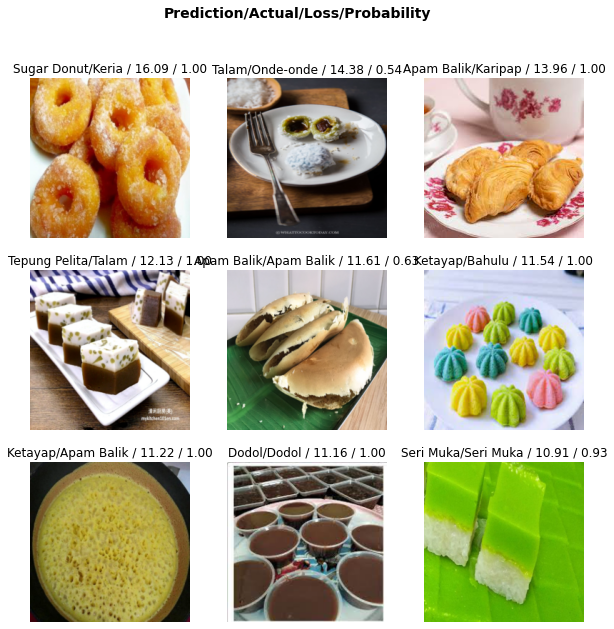

In [ ]:
# show top losses of classifier
interp.plot_top_losses(9, figsize=(10,10))

In [ ]:
from fastai.vision.widgets import ImageClassifierCleaner

In [ ]:
#clean misclassified image
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
# export model as pickle file
learn.export('kuih02.pkl')

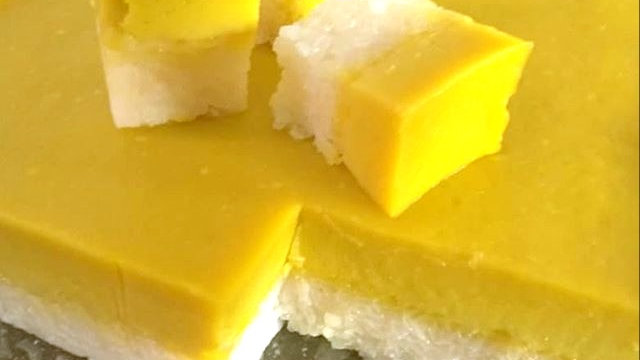

In [ ]:
img_kuih= load_image(Path(root_path)/'/content/serimuka.jpg')
img_kuih

In [ ]:
is_kuih,_,probs = learn.predict(PILImage.create(Path(root_path)/'/content/serimuka.jpg'))
print(f"This is a: {is_kuih}.")

This is a: Bingka Ubi.
